**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


Defaulting to user installation because normal site-packages is not writeable


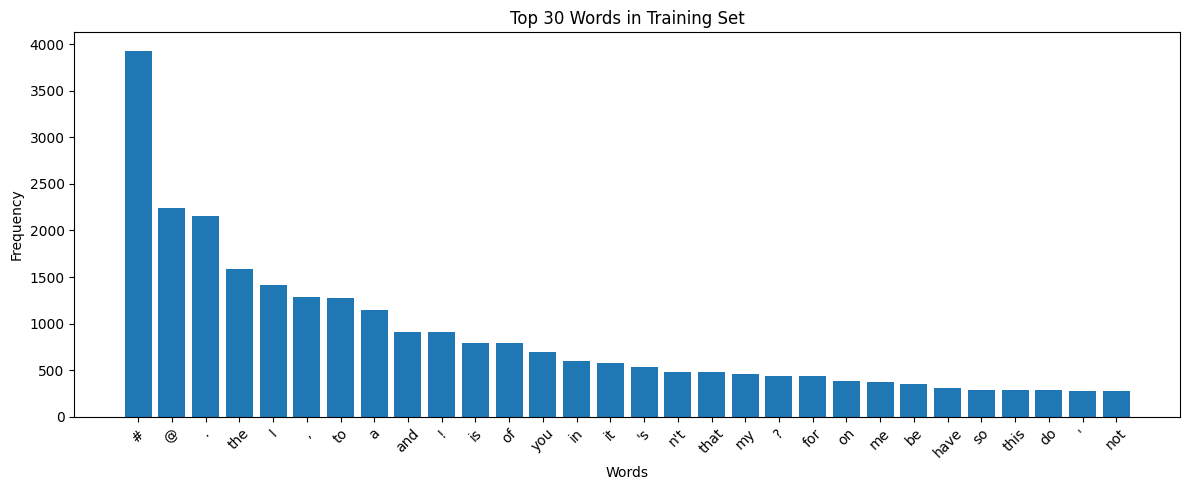

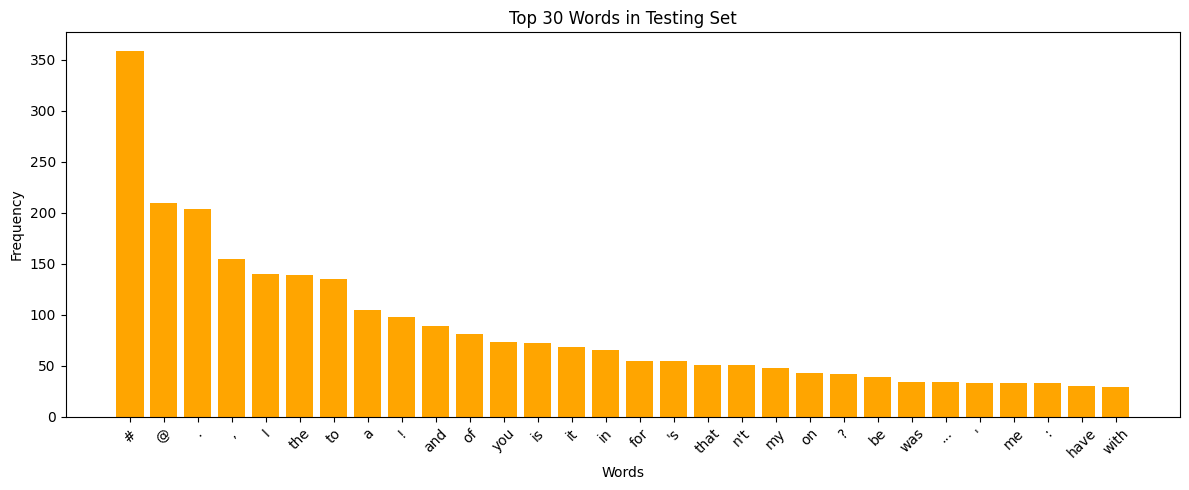

In [6]:
# Answer here
# Import necessary libraries
!pip install nltk
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the text in train and test datasets
train_df['tokens'] = train_df['text'].apply(nltk.word_tokenize)
test_df['tokens'] = test_df['text'].apply(nltk.word_tokenize)

# Flatten the token lists and count word frequencies
train_words = [word for tokens in train_df['tokens'] for word in tokens]
test_words = [word for tokens in test_df['tokens'] for word in tokens]

train_freq = Counter(train_words).most_common(30)
test_freq = Counter(test_words).most_common(30)

# Plot top 30 words in training set
plt.figure(figsize=(12, 5))
plt.bar([word for word, _ in train_freq], [count for _, count in train_freq])
plt.title("Top 30 Words in Training Set")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot top 30 words in testing set
plt.figure(figsize=(12, 5))
plt.bar([word for word, _ in test_freq], [count for _, count in test_freq], color='orange')
plt.title("Top 30 Words in Testing Set")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [7]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [8]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [9]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

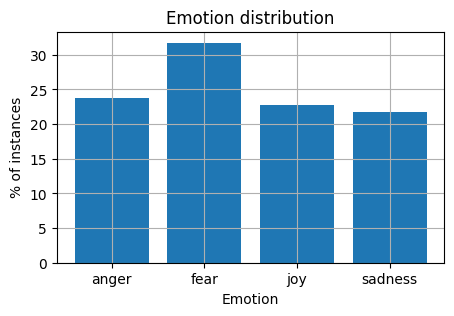

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [19]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/kaltunmustafemohamed/Documents-k/2025projects/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 4, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [2, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [23]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here
# Import the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer with 1000 features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit on training data and transform both train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])

# Convert to array for inspection
X_train_array = X_train_tfidf.toarray()

# Show feature names for indices 100 to 110
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Feature names [100:110]:")
print(feature_names[100:111])



Feature names [100:110]:
['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling' 'book']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'fear', 'anger', 'anger', 'fear', 'fear', 'fear',
       'joy', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

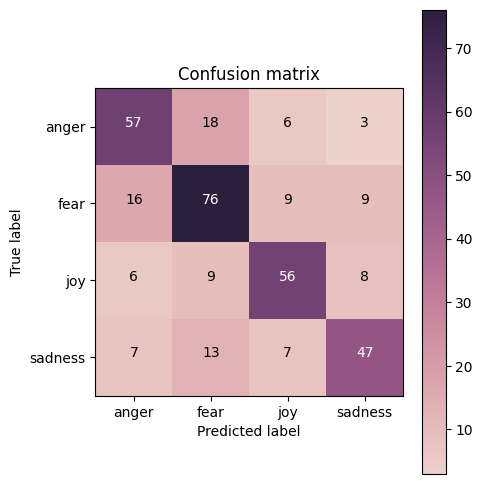

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

# Answer here
Interpretation:
The Decision Tree model performs best on joy, with 74 correct predictions. Fear and sadness are frequently confused, indicating overlapping emotional cues. Anger is misclassified as fear and sadness, suggesting the model struggles with negative emotion boundaries. Overall, the model shows signs of overfitting and could benefit from improved features or alternative classifiers.


---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [32]:
# Answer here
#Create Bag-of-Words features using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=1000)  # Limit to 1000 features
X_train_bow = bow_vectorizer.fit_transform(train_df['text'])  # Fit on training text
X_test_bow = bow_vectorizer.transform(test_df['text'])        # Transform test text

#Train the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()  # Initialize model
nb_model.fit(X_train_bow, train_df['emotion'])  # Train using emotion labels

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_bow)

#  Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(test_df['emotion'], y_pred_nb))  # Overall accuracy
print("Classification Report:\n", classification_report(test_df['emotion'], y_pred_nb))  # Precision, recall, F1
print("Confusion Matrix:\n", confusion_matrix(test_df['emotion'], y_pred_nb))  # Breakdown of predictions





Accuracy: 0.7636887608069164
Classification Report:
               precision    recall  f1-score   support

       anger       0.72      0.77      0.75        84
        fear       0.76      0.78      0.77       110
         joy       0.86      0.77      0.81        79
     sadness       0.73      0.72      0.72        74

    accuracy                           0.76       347
   macro avg       0.77      0.76      0.76       347
weighted avg       0.77      0.76      0.76       347

Confusion Matrix:
 [[65  9  5  5]
 [13 86  1 10]
 [ 7  6 61  5]
 [ 5 12  4 53]]


**Testing Results:**
The Naive Bayes model achieved 76.4% accuracy. It performed best on joy and fear, with joy showing the highest precision (0.86). Anger and sadness had moderate overlap with fear. Compared to the Decision Tree, Naive Bayes offers better generalization and more balanced predictions across emotion classes.


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
 **Comparison:**
Naive Bayes outperformed Decision Tree with 76.4% accuracy vs 68%. It showed more balanced predictions and less overfitting. Theoretically, Naive Bayes handles sparse text data better due to its probabilistic nature and independence assumption, while Decision Trees tend to overfit by memorizing training patterns. This explains the stronger generalization of Naive Bayes in emotion classification.


---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [42]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [43]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [44]:
import keras

In [45]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [46]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3021    sadness
1769       fear
295       anger
3429    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [47]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [48]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [49]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)




---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [50]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3698 - loss: 1.3320 - val_accuracy: 0.4006 - val_loss: 1.2930
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.6479 - loss: 0.9844 - val_accuracy: 0.6455 - val_loss: 0.9366
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7935 - loss: 0.5781 - val_accuracy: 0.6945 - val_loss: 0.8174
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8400 - loss: 0.4177 - val_accuracy: 0.7032 - val_loss: 0.8069
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8796 - loss: 0.3370 - val_accuracy: 0.6916 - val_loss: 0.8658
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9045 - loss: 0.2728 - val_accuracy: 0.7032 - val_loss: 0.9005
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9258 - loss: 0.2251 - val_accuracy: 0.6916 - val_loss: 0.9693
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9402 - loss: 0.1889 - va

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [51]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[1.3143428e-01, 4.0893275e-01, 1.3321575e-02, 4.4631135e-01],
       [7.1135294e-01, 7.6570876e-02, 1.5363476e-01, 5.8441352e-02],
       [2.7777896e-09, 9.9874026e-01, 3.4802632e-09, 1.2597302e-03],
       [9.9744534e-01, 2.8342527e-04, 1.7732627e-06, 2.2694496e-03],
       [9.9999893e-01, 3.5822825e-07, 1.1820997e-08, 7.5896395e-07]],
      dtype=float32)

In [52]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'anger', 'fear', 'anger', 'anger'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [54]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.369776,1.331982,0.400576,1.293030
1,1,0.647938,0.984420,0.645533,0.936577
2,2,0.793523,0.578079,0.694524,0.817405
3,3,0.840022,0.417654,0.703170,0.806908
4,4,0.879601,0.336981,0.691643,0.865810
5,5,0.904512,0.272764,0.703170,0.900484
6,6,0.925823,0.225063,0.691643,0.969284
7,7,0.940216,0.188894,0.674352,1.028885
8,8,0.953501,0.158750,0.677233,1.089610
9,9,0.958483,0.144155,0.694524,1.144392


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


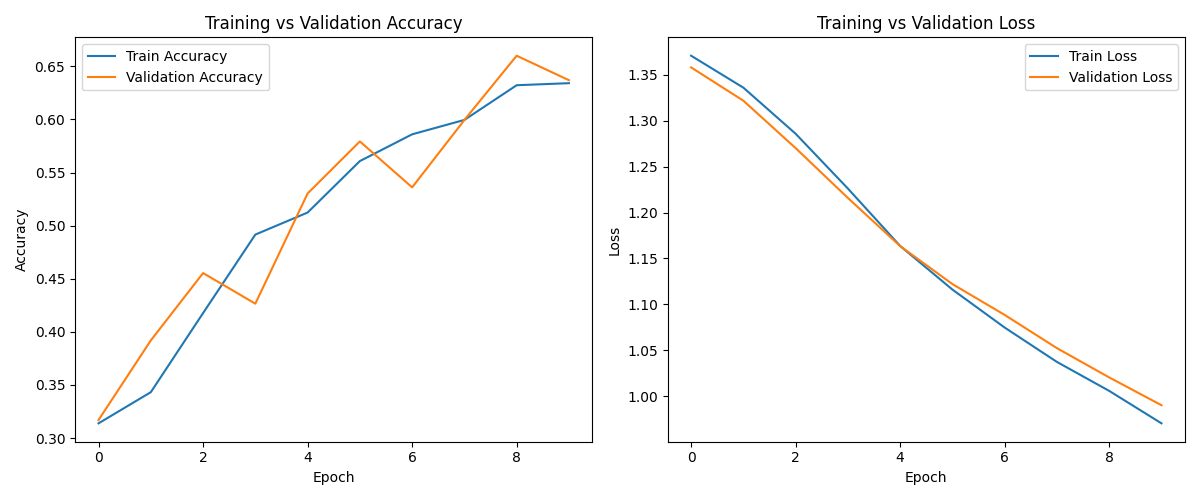

In [55]:
#Answer 
from IPython.display import Image
Image(filename='pics/exercise6_accuracy_loss.png')


>Interpretation

The training accuracy increased steadily across epochs, while the validation accuracy improved more slowly and began to plateau. This suggests that the model is learning the training data well but struggles to generalize beyond it.

The training loss decreased consistently, while the validation loss remained relatively flat or slightly increased. This divergence between training and validation performance is a classic sign of overfitting.

Connection to Overfitting and Underfitting

Overfitting: The model performs well on the training data but poorly on the validation data. It memorizes patterns specific to the training set rather than learning generalizable features.

Underfitting: The model performs poorly on both the training and validation sets, which is not the case here.

My model shows signs of overfitting, especially after epochs 6–7. To improve generalization, I could apply techniques such as:

1.Dropout (already used)

2.Early stopping

3.Regularization

4.Reducing model complexity

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [56]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3021,40194,Life is too short so dont shoot it in with wor...,"[Life, is, too, short, so, dont, shoot, it, in..."
1769,20912,ACT 4 #anxiety &amp; #depression group. @livin...,"[ACT, 4, #, anxiety, &, amp, ;, #, depression,..."
295,10295,@SkyNews when the East wind blue in summer in ...,"[@, SkyNews, when, the, East, wind, blue, in, ..."
3429,40602,@JonathanHatfull I’ll look forward to it. Hopi...,"[@, JonathanHatfull, I, ’, ll, look, forward, ..."
816,10816,I should really study today for chemistry but ...,"[I, should, really, study, today, for, chemist..."


In [57]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Life', 'is', 'too', 'short', 'so', 'dont', 'shoot', 'it', 'in', 'with', 'worries', 'sadness', 'and', 'grief', '.']),
       list(['ACT', '4', '#', 'anxiety', '&', 'amp', ';', '#', 'depression', 'group', '.', '@', 'livingwellihc', 'beginning', 'Mon', 'October', '17', 'for', '6', 'weeks', '.', 'Contact', 'me', 'to', 'register', 'now', '!', '#', 'mindfulness', '#', 'Halifax']),
       list(['@', 'SkyNews', 'when', 'the', 'East', 'wind', 'blue', 'in', 'summer', 'in', 'Durban', ',', 'S', 'Africa', ',', 'we', 'still', 'surfed', 'and', 'got', '#', 'stung', 'badly', '!', 'Must', 'be', 'carefull-A', '#', 'sting', 'can', 'harm', 'you'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [58]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [59]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 2.68062264e-01,  1.05859861e-01,  1.65315956e-01, -1.06079549e-01,
       -3.59767348e-01, -1.02256262e+00,  1.09990358e+00,  1.02121401e+00,
       -3.42225403e-01, -5.94534218e-01, -4.75336999e-01, -3.45922679e-01,
       -3.60743016e-01,  4.73888308e-01, -1.69659033e-01, -4.06740963e-01,
        1.96273569e-02, -6.46201253e-01,  2.25829586e-01, -1.03148806e+00,
        6.81525111e-01,  1.02627051e+00,  6.38942599e-01, -2.96032578e-02,
        1.96022704e-01,  3.06462348e-01, -7.63268232e-01,  4.03059155e-01,
       -7.15928197e-01,  6.40966147e-02,  1.83409676e-01, -3.77447724e-01,
        5.48116505e-01, -5.72534740e-01, -1.73060577e-02,  5.12266040e-01,
        3.26467097e-01,  4.56947237e-02, -5.51556885e-01, -1.22701703e-03,
       -4.69679162e-02, -2.27543145e-01, -5.73591769e-01,  4.39428598e-01,
        1.12183928e+00, -1.48969054e-01, -1.11211967e+00,  1.85849220e-01,
        6.73042119e-01,  9.31523144e-01,  2.58634955e-01, -3.06279004e-01,
       -2.88743507e-02, -

In [60]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9193925857543945),
 ('help', 0.9131123423576355),
 ('blessed', 0.9096879363059998),
 ('plz', 0.9079040288925171),
 ('adventure', 0.8985529541969299),
 ('👌', 0.8952943086624146),
 ('bday', 0.8942235708236694),
 ('cant', 0.8924569487571716),
 ("'be", 0.8917002081871033),
 ('.\\nA', 0.8915196061134338)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [61]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [62]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [63]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


# Answer here

**Here's the general idea:**

1. Tokenize the sentences 
   First, we break each sentence into individual words and convert those words into numbers (word indices).

2. Pad the sequences 
   Since sentences are different lengths, we pad them so they all have the same number of words. This makes the input shape consistent.

3. Use an embedding matrix 
   We create a matrix that maps each word index to its corresponding word vector. This way, when the model sees a word index, it knows what vector to use.

4. Feed into an embedding layer  
   In the model, we use an embedding layer that takes the word indices and replaces them with the actual word vectors.

5. Build sentence-level representation 
   To turn the whole sentence into a single vector, we can:
   - Average all the word vectors (`GlobalAveragePooling1D`)
   - Use an LSTM or GRU to capture word order and context
   - Use a CNN to detect local patterns

6. Train the model  
   Once we have sentence-level vectors, we can pass them into a classifier (like Dense layers) and train the model to predict emotions or other labels.

**Why This Works**

Word vectors capture the meaning of individual words. By combining them across a sentence, we give the model a way to understand the overall meaning and make predictions.



---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [64]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [65]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [66]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [67]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [68]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

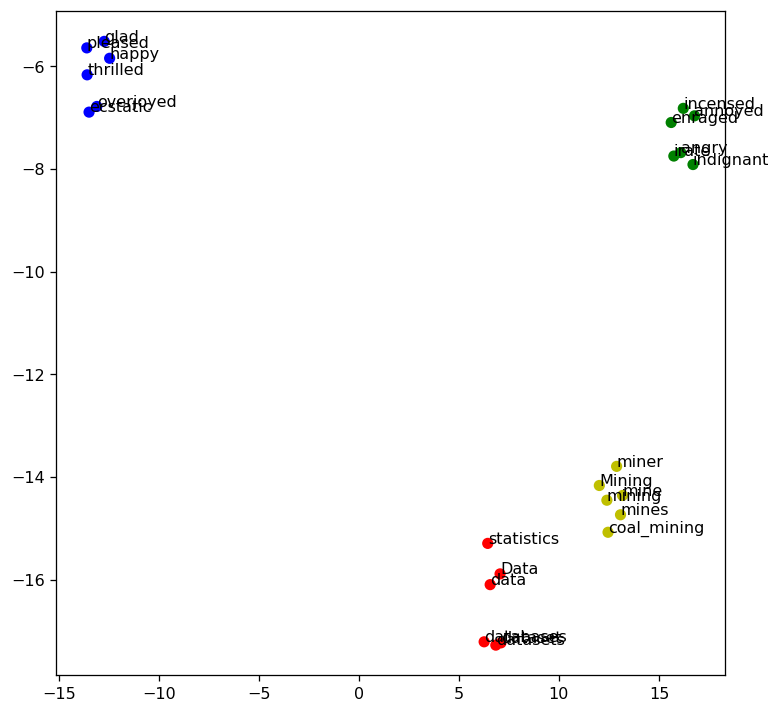

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

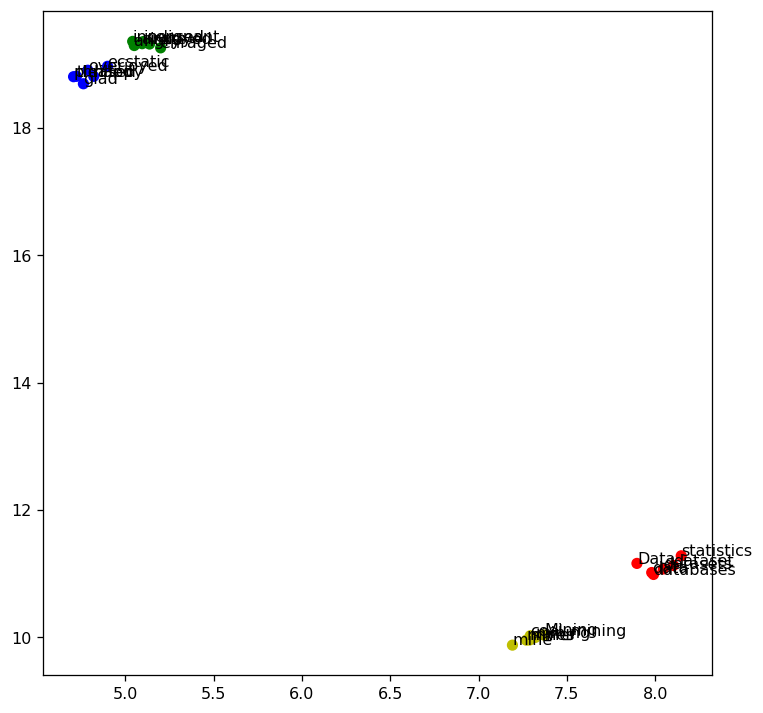

In [70]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

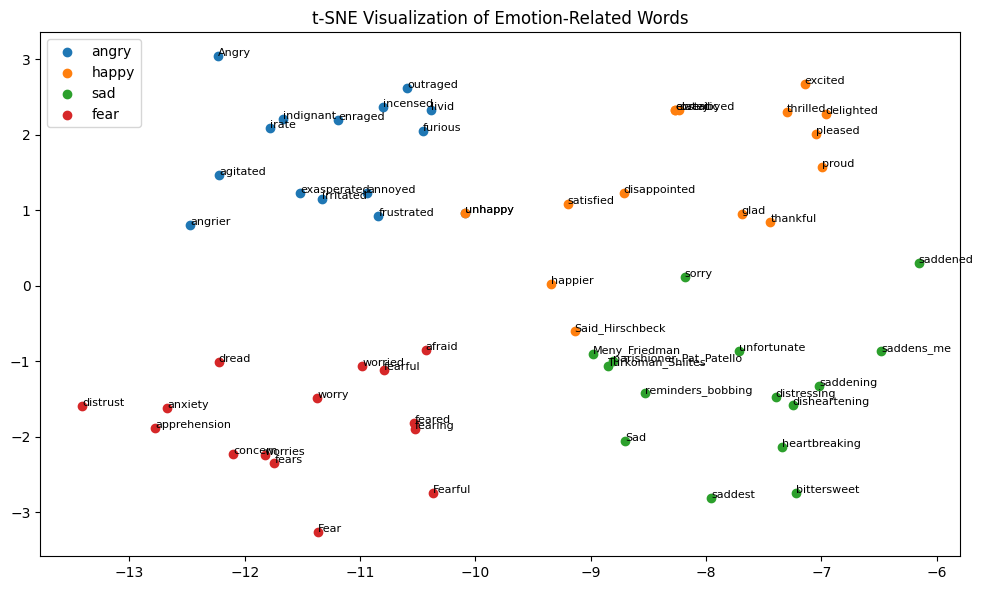

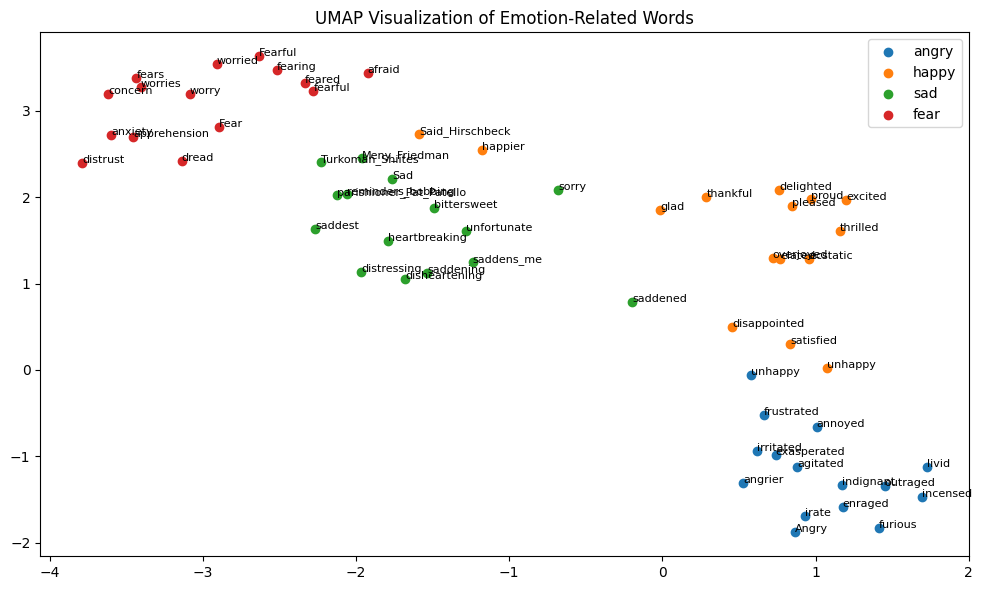

In [71]:
# Answer here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from gensim.models import KeyedVectors

# Define emotion words
target_words = ['angry', 'happy', 'sad', 'fear']

# Get 15 most similar words for each emotion
emotion_groups = {}
for word in target_words:
    emotion_groups[word] = [w for w, _ in model.most_similar(word, topn=15)]

# Flatten word list and get vectors
all_words = sum(emotion_groups.values(), [])
word_vectors = np.array([model[word] for word in all_words])

# Create labels for coloring
labels = []
for emotion, words in emotion_groups.items():
    labels.extend([emotion] * len(words))

# t-SNE visualization
tsne_result = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(word_vectors)
plt.figure(figsize=(10, 6))
for emotion in target_words:
    idx = [i for i, label in enumerate(labels) if label == emotion]
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], label=emotion)
    for i in idx:
        plt.text(tsne_result[i, 0], tsne_result[i, 1], all_words[i], fontsize=8)
plt.title('t-SNE Visualization of Emotion-Related Words')
plt.legend()
plt.tight_layout()
plt.savefig('tsne_emotions.png')
plt.show()

# UMAP visualization
umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(word_vectors)
plt.figure(figsize=(10, 6))
for emotion in target_words:
    idx = [i for i, label in enumerate(labels) if label == emotion]
    plt.scatter(umap_result[idx, 0], umap_result[idx, 1], label=emotion)
    for i in idx:
        plt.text(umap_result[i, 0], umap_result[i, 1], all_words[i], fontsize=8)
plt.title('UMAP Visualization of Emotion-Related Words')
plt.legend()
plt.tight_layout()
plt.savefig('umap_emotions.png')
plt.show()



Exercise 8: t-SNE vs UMAP Visualization

I visualized the 15 most similar words to each emotion ("angry", "happy", "sad", "fear") using t-SNE and UMAP.

- **t-SNE** formed tight clusters but didn’t show clear separation between emotion groups.
- **UMAP** showed better global structure and clearer separation between emotions.
- Words like "fear" and "sad" appeared closer together in both graphs, suggesting semantic overlap.

Both methods help us understand how emotion-related words are grouped in vector space, but UMAP gives a more interpretable layout for comparing emotions.
